In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import adam_v2
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#specify the path to the train/test folders
train_dir = '../input/fer2013/train'
val_dir = '../input/fer2013/test'
#set image pixels to value of 1 or 0
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

#set image size/color/class for training and validation
train_generator = train_datagen.flow_from_directory(
        train_dir,
        #images in FER-2013 dataset are grayscale and 48x48
        target_size=(48,48),
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

2022-05-15 17:36:59.201798: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 17:36:59.323113: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 17:36:59.323916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-15 17:36:59.325665: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
#train model over 50 iterations
model.compile(loss='categorical_crossentropy', optimizer=adam_v2.Adam(learning_rate=0.0001, decay=1e-7),metrics=['accuracy'])
model_info = model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

2022-05-15 17:37:02.194421: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-05-15 17:37:03.844579: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


448/448 [==============================] - 70s 138ms/step - loss: 1.8203 - accuracy: 0.2532 - val_loss: 1.8082 - val_accuracy: 0.2478
Epoch 2/100
448/448 [==============================] - 41s 92ms/step - loss: 1.7832 - accuracy: 0.2578 - val_loss: 1.7624 - val_accuracy: 0.2698
Epoch 3/100
448/448 [==============================] - 33s 73ms/step - loss: 1.7254 - accuracy: 0.3012 - val_loss: 1.6620 - val_accuracy: 0.3538
Epoch 4/100
448/448 [==============================] - 28s 62ms/step - loss: 1.6213 - accuracy: 0.3649 - val_loss: 1.5196 - val_accuracy: 0.4104
Epoch 5/100
448/448 [==============================] - 25s 57ms/step - loss: 1.5313 - accuracy: 0.4081 - val_loss: 1.4295 - val_accuracy: 0.4520
Epoch 6/100
448/448 [==============================] - 23s 52ms/step - loss: 1.4668 - accuracy: 0.4389 - val_loss: 1.4443 - val_accuracy: 0.4548
Epoch 7/100
448/448 [==============================] - 24s 52ms/step - loss: 1.3992 - accuracy: 0.4574 - val_loss: 1.3261 - val_accuracy: 0.4

In [5]:
model.save('v6model.h5')

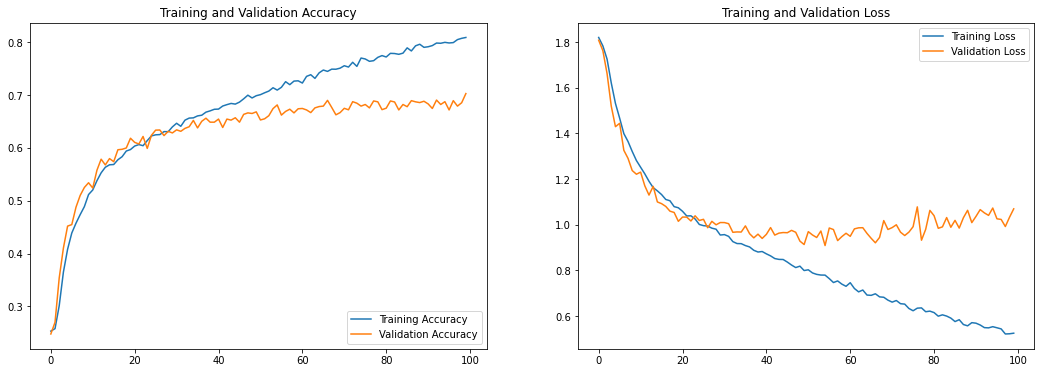

In [6]:
acc = model_info.history['accuracy']
val_acc = model_info.history['val_accuracy']

loss = model_info.history['loss']
val_loss = model_info.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.savefig('bestModelGraph.png')
plt.show()
